### Introduction to Machine Learning with Python
## Chapter 3. 비지도 학습과 데이터 전처리
---
## MNIST 숫자이미지

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits

mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
mnist.target

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
mnist.images.shape

(1797, 8, 8)

In [5]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
mnist.images.max(), mnist.images.min()

(16.0, 0.0)

Text(0.5,1,'1')

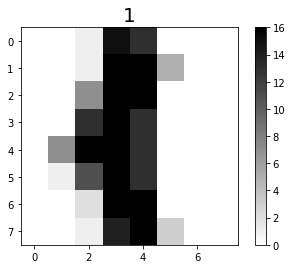

In [6]:
plt.imshow(mnist.images[99], vmin=0, vmax=16, cmap='gray_r')
plt.colorbar()
plt.title(mnist.target[99], fontsize=20)

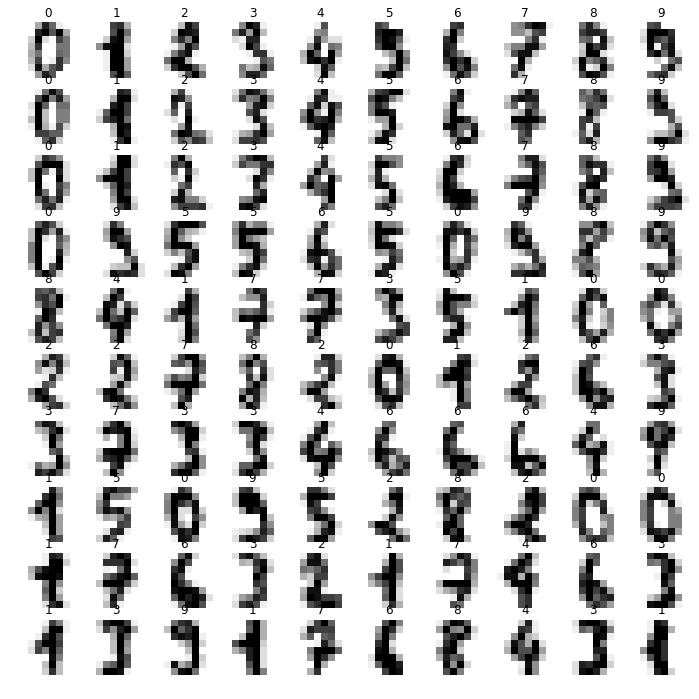

In [8]:
plt.figure(figsize=[12,12])
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(mnist.images[i], cmap='gray_r')
    plt.axis('off')
    plt.title(mnist.target[i])

### 이미지 저장위치

- C:\Anaconda3\Lib\site-packages\sklearn\datasets\data\digits.csv.gz
- 압축을 풀면 digits.csv 파일을 얻는다.
- 아래에서 직접 읽어와 보자.

In [8]:
data = np.loadtxt('digits.csv', delimiter=',')
data.shape

(1797, 65)

In [9]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.,  0.])

Text(0.5,1,'0.0')

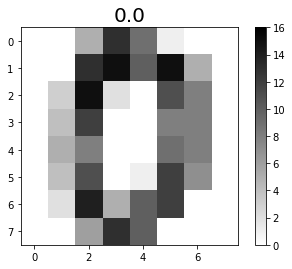

In [10]:
X = data[:,:-1].reshape(-1,8,8)
y = data[:,-1]

plt.imshow(X[0], vmin=0, vmax=16, cmap='gray_r')
plt.colorbar()
plt.title(y[0], fontsize=20)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target)
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9644444444444444

In [103]:
pred_y = model.predict(X_test)

result = np.zeros([10,10])
for i in range(len(y_test)):
    result[y_test[i],pred_y[i]] +=1
    
result

array([[47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 40.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1., 39.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 36.,  0.,  1.,  0.,  1.,  2.,  0.],
       [ 0.,  1.,  0.,  0., 43.,  0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0., 45.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 48.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 36.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 44.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 59.]])

### PCA 적용

In [11]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(mnist.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca.components_.shape

(2, 64)

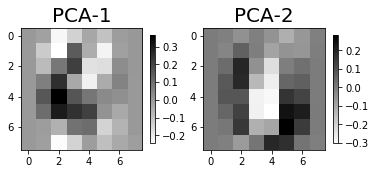

In [13]:
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(pca.components_[i].reshape(8,8), cmap='gray_r')
    plt.colorbar(shrink=0.5)
    plt.title('PCA-'+str(i+1), fontsize=20)

In [14]:
X_pca = pca.transform(mnist.data)
X_pca.shape

(1797, 2)

In [15]:
X_pca[:5]

array([[ -1.25946655,  21.2748837 ],
       [  7.95761137, -20.76869818],
       [  6.99192303,  -9.95598713],
       [-15.90610534,   3.33246421],
       [ 23.30686753,   4.26906161]])

### PCA 변환 결과 산점도 그리기

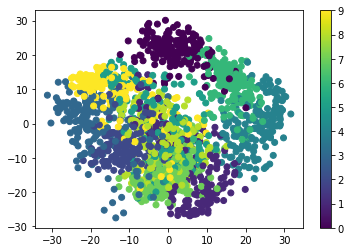

In [16]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=mnist.target)
plt.colorbar()

In [17]:
xmax, ymax = X_pca.max(axis=0)
xmin, ymin = X_pca.min(axis=0)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

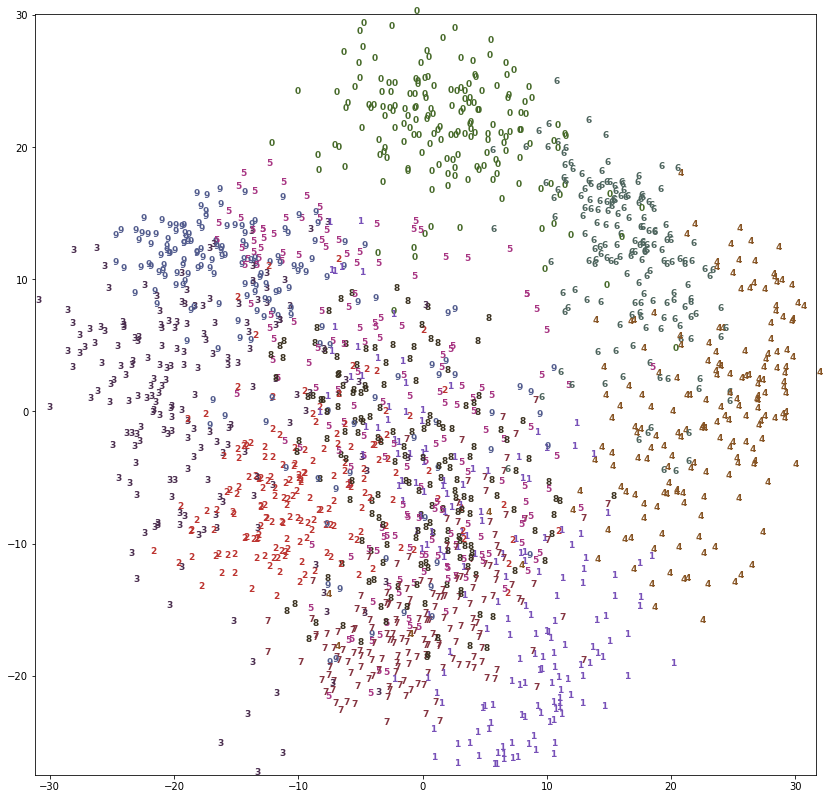

In [18]:
plt.figure(figsize=[14,14])
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
for i in range(len(X_pca)):
    plt.text(X_pca[i,0], X_pca[i,1], str(mnist.target[i]),
             color=colors[mnist.target[i]], fontdict={'weight':'bold', 'size':9})

### PCA 이미지 복원

In [92]:
recovered2 = np.matmul(X_pca, pca.components_)
# recovered2 = np.dot(X_pca, pca.components_)
# recovered2 = X_pca @ pca.components_

In [93]:
recovered2[0].min(), recovered2[0].max()

(-6.680015663560447, 6.255313836559186)

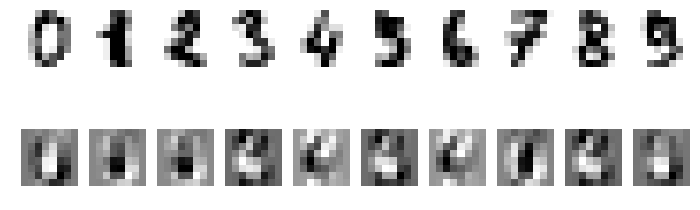

In [90]:
plt.figure(figsize=[12,4])
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(mnist.images[i], cmap='gray_r')
    plt.axis('off')

    plt.subplot(2,10,10+i+1)
    plt.imshow(recovered2[i].reshape(8,8), cmap='gray_r')
    plt.axis('off')

### k-NN 적용

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(5)
knn.fit(X_pca, mnist.target)
knn.score(X_pca, mnist.target)

0.7301057317751809

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, mnist.target)

knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6133333333333333

### 다른 모델 적용

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5644444444444444

In [44]:
from sklearn.svm import SVC

svc = SVC(gamma=0.01)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.6533333333333333

### 일대다 분류

In [63]:
scores_lr = []

for digit in range(10):
    y = mnist.target.copy()
    y = np.where(y==digit, 0, 1)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y)
    lr2 = LogisticRegression()
    lr2.fit(X_train, y_train)
    score = lr2.score(X_test, y_test)
    scores_lr.append(score)

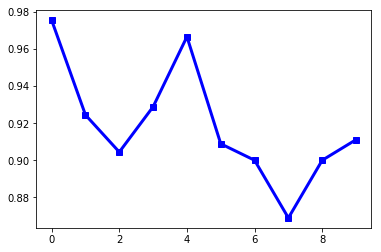

In [64]:
plt.plot(scores_lr, 'bs-', lw=3)

In [66]:
scores_svc = []

for digit in range(10):
    y = mnist.target.copy()
    y = np.where(y==digit, 0, 1)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y)
    svc2 = SVC(gamma=0.01)
    svc2.fit(X_train, y_train)
    score = svc2.score(X_test, y_test)
    scores_svc.append(score)

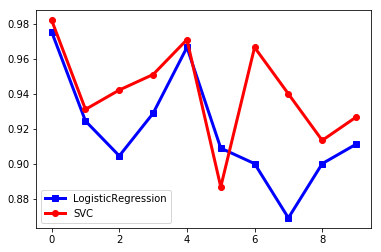

In [67]:
plt.plot(scores_lr, 'bs-')
plt.plot(scores_svc, 'ro-')
plt.legend(['LogisticRegression', 'SVC'])

### 클래스 편중 문제
- 숫자 0 과 나머지를 비교할 때, 데이터의 비율이 1:9 이다.
- 이 경우, 숫자가 0이 아니라고 판단하면 90% 는 맞는다.
- 즉, 90% 를 많이 넘어서야 의미있는 결과이다.

In [75]:
np.bincount(mnist.target)

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64)

In [76]:
y = mnist.target.copy()
y = np.where(y==0, 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y)
svc3 = SVC(gamma=0.01)
svc3.fit(X_train, y_train)
svc3.score(X_test, y_test)

0.9777777777777777

In [77]:
pred_y = svc3.predict(X_test)
pred_y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [80]:
result = pred_y[np.where(y_test==0)[0]]
result

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0])

In [81]:
np.bincount(result)

array([39, 10], dtype=int64)

In [10]:
39/49

0.7959183673469388

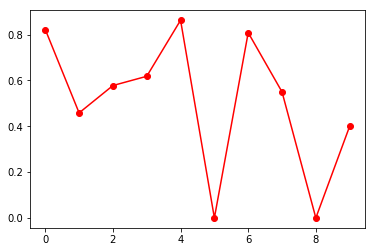

In [83]:
scores_svc = []

for digit in range(10):
    y = mnist.target.copy()
    y = np.where(y==digit, 0, 1)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y)
    svc2 = SVC(gamma=0.01)
    svc2.fit(X_train, y_train)
    pred_y = svc2.predict(X_test)
    result = pred_y[np.where(y_test==0)[0]]
    scores_svc.append((result==0).sum()/len(result))
    
plt.plot(scores_svc, 'ro-')

### 일대다 분류 (계속)

In [68]:
scores_knn = []

for digit in range(10):
    y = mnist.target.copy()
    y = np.where(y==digit, 0, 1)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y)
    knn2 = KNeighborsClassifier(5)
    knn2.fit(X_train, y_train)
    score = knn2.score(X_test, y_test)
    scores_knn.append(score)

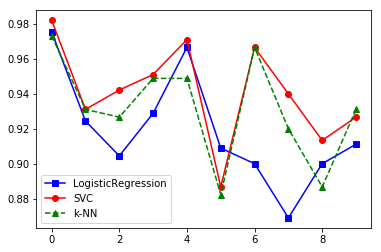

In [69]:
plt.plot(scores_lr, 'bs-')
plt.plot(scores_svc, 'ro-')
plt.plot(scores_knn, 'g^--')
plt.legend(['LogisticRegression', 'SVC', 'k-NN'])

In [70]:
from sklearn.tree import DecisionTreeClassifier
scores_tree = []

for digit in range(10):
    y = mnist.target.copy()
    y = np.where(y==digit, 0, 1)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y)
    tree2 = DecisionTreeClassifier(max_depth=5)
    tree2.fit(X_train, y_train)
    score = tree2.score(X_test, y_test)
    scores_tree.append(score)

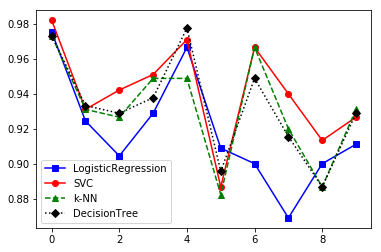

In [71]:
plt.plot(scores_lr, 'bs-')
plt.plot(scores_svc, 'ro-')
plt.plot(scores_knn, 'g^--')
plt.plot(scores_tree, 'kD:')
plt.legend(['LogisticRegression', 'SVC', 'k-NN', 'DecisionTree'])

### t-SNE 적용

- t-SNE 는 매니폴드(manifold) 학습의 일종입니다. 매니폴드는 아래 그림에서 보듯이 고차원의 데이터가 숨겨져 있는 저차원으로 표현할 수 있을 것이라는 가정을 가지고 데이터를 변환하는 것입니다.<br>
<img src="ch03_03.jpg" />
(출처 : https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction#Manifold_learning_algorithms)<br><br>

- t-SNE(t-distributed stochastic neighbor embedding) 는 점들 사이의 거리를 기반으로 주로 2차원 평면 상에 점들을 뿌리는 방식입니다. 가까이 있는 점들은 가깝게 위치하려고 합니다. 그리고 가까운 점들에 가중치를 더 줘서 가까운 점들을 더 잘 보존하려고 합니다. (SVM 에서 배운 rbf 와 유사한 거리 함수를 사용합니다.)
- 숫자 이미지 데이터인 MNIST 를 가지고 테스트 하겠습니다.

In [72]:
from sklearn.manifold import TSNE

tsne = TSNE()

mnist_tsne = tsne.fit_transform(mnist.data)

In [73]:
mnist_tsne.shape

(1797, 2)

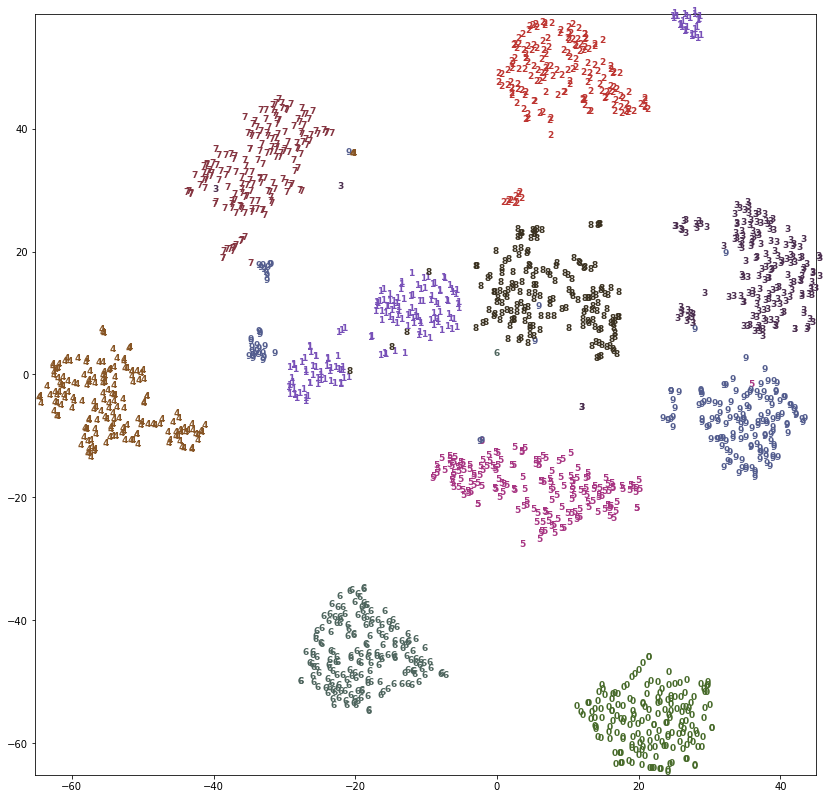

In [74]:
xmax, ymax = mnist_tsne.max(axis=0)
xmin, ymin = mnist_tsne.min(axis=0)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=[14,14])
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
for i in range(mnist.data.shape[0]):
    plt.text(mnist_tsne[i,0], mnist_tsne[i,1],str(mnist.target[i]),
             color=colors[mnist.target[i]], fontdict={'weight':'bold', 'size':9})